<a href="https://colab.research.google.com/github/MonkeyWrenchGang/PythonBootcamp/blob/main/day_4/4_6_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 4 Practice: Opioids and Medicare Part D



---

## Background

The opioid crisis, stemming from the misuse and addiction to opioid drugs, intersects with Medicare Part D, the prescription drug benefit program under Medicare.

Prescription opioids, specifically, have played a significant role in fueling the opioid crisis. These powerful pain-relieving medications, such as oxycodone and hydrocodone, are prescribed to manage acute or chronic pain. However, overprescription and misuse of prescription opioids have led to addiction and subsequent misuse by individuals initially prescribed opioids for legitimate medical purposes.

Medicare Part D plans cover various prescription drugs, including opioids for pain management. While Part D provides essential access to medications, concerns have arisen regarding the appropriate use and potential misuse of prescription opioids covered by the program. In response, Medicare has implemented policies and programs to prevent overprescribing, promote safe opioid use, and mitigate the risk of opioid misuse and addiction.




In [1]:
# supress stupid warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Part 1. Opioid Analysis

The "nc_opioid" dataset contains information about healthcare providers in North Carolina and their involvement with opioids. It includes various attributes related to providers, their specialties, practice details, opioid prescriptions, and Medicare payments.

Here are some key features of the dataset:

- NPI (National Provider Identifier): Unique identification number for each healthcare provider.
- Credentials: Professional credentials or degrees of the healthcare providers (e.g., M.D., D.O., PA-C).
- Gender: Gender of the provider.
- Entity_Type: Type of healthcare entity (e.g., individual, organization).
- Street_Address_1 and Street_Address_2: Address details of the providers.
- State_Code: State code for North Carolina (NC).
- Provider_Type: Type of healthcare provider (e.g., Physician Assistant, Gastroenterology).
- Num_of_Services: Number of services provided by the healthcare provider.
- Num_of_Medicare_Beneficiaries: Number of Medicare beneficiaries served by the provider.
- Total_Medicare_Payment_Amt: Total payment amount received from Medicare.
- Average_Age_of_Beneficiaries: Average age of the Medicare beneficiaries served by the provider.
- Medical_school_name: Name of the medical school attended by the provider.
- Graduation_year: Graduation year of the provider.
- Primary_specialty: Primary specialty of the provider.
- Organization_legal_name: Legal name of the healthcare organization.
- City_name: City name where the provider is located.
- Population_est: Estimated population of the city.
- People_sq_mile: Population density in people per square mile.
- Years_in_Practice: Years of practice for the provider.
- Full_Name: Full name of the provider.
- Opioid prescription counts: Various columns represent the counts or script counts for different types of opioids prescribed by the providers.

This dataset allows for analyzing and exploring the relationship between healthcare providers, their practice details, Medicare payments, and their involvement in prescribing opioids. It provides valuable insights into the healthcare landscape and the impact of opioid-related practices in North Carolina.

## Exercises


---



Exercise 1: Top 5 provider types with the highest total opioid prescription counts
- Calculate the total number of opioid prescriptions (sum of script counts) for each provider type.
- Identify the top 5 provider types with the highest total opioid prescription counts.
- Plot a bar chart to visualize the distribution of opioid prescription counts across different provider types.

Exercise 2: Top 10 cities with the highest average number of Medicare beneficiaries
- Group the providers by city_name and calculate the average "Num_of_Medicare_Beneficiaries" for each city.
- Identify the top 10 cities with the highest average number of Medicare beneficiaries.
- Plot a bar chart to display the average number of beneficiaries for these top cities.

Exercise 3: Family Practice box plot of "Average_Age_of_Beneficiaries"

- Create a boxplot of the "Average_Age_of_Beneficiaries" where provider types == Family Practice.

Exercise 4: Payment Analysis
- Calculate the total Medicare payment amount for each provider type.
- Identify the top 5 provider types with the highest total Medicare payment amounts.
- Plot a bar chart to visualize the distribution of Medicare payment amounts for these top provider types.

Exercise 5: Opioid Comparison
- Compare the prescription counts for different types of opioids (e.g., HYDROCODONE, OXYCODONE) across providers.
- Identify the top 3 opioids with the highest prescription counts.
- Plot a bar chart to display the prescription counts of these top opioids.

Exercise 6: Rank and Top 10 by Total Medicare Payment Amount

- Create a new column "payment_rank" using the rank() function and "Total_Medicare_Payment_Amt" where the largest payment amount receives rank #1.
- Select the top 10 providers based on "Total_Medicare_Payment_Amt".
- Output a table with the following columns: 'payment_rank', 'Full_Name', 'Credentials', 'city_name', 'Gender', 'Provider_Type','Total_Medicare_Payment_Amt', 'Medical_school_name', 'Graduation_year', 'Primary_specialty'.

Exercise 7: Top 10 Cities by Summing Oxycodone Day Count

- Calculate the total sum of "oxycodone_day_count" for each city_name.
- Identify the top 10 cities with the highest sum of oxycodone day count.
- Output a table showing the top 10 cities and their respective sums of oxycodone day count.





In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/PythonBootcamp/main/day_4/data/NC_OPIOID_ANALYSIS.csv")
df.head()

,NPI,Credentials,Gender,Entity_Type,Street_Address_1,Street_Address_2,State_Code,Provider_Type,Num_of_Services,Num_of_Medicare_Beneficiaries,...,HYDROCODONE_script_count,tramadol_script_count,Percocet_script_count,oxycodone_script_count,fentanyl_script_count,levothyroxine_script_count,potassium_script_count,metformin_script_count,diltiazem_script_count,gabapentin_script_count
0,1003007964,PA-C,F,I,3101 LATROBE DR,NaN,NC,Physician Assistant,103.0,82,...,34,0,0,0,0,0,0,0,0,0
1,1003011578,M.D.,F,I,415 N CENTER ST,SUITE 300,NC,Gastroenterology,1281.0,530,...,0,0,0,0,0,0,0,0,0,0
2,1003013756,D.O.,M,I,2651 MORGANTON BLVD SW,NaN,NC,Family Practice,1476.0,474,...,40,32,15,0,0,81,0,173,0,60
3,1003026550,PA-C,M,I,301 YADKIN ST,NaN,NC,Physician Assistant,1176.0,256,...,123,11,309,633,33,0,0,0,0,23
4,1003031691,M.D.,M,I,2800 BLUE RIDGE RD STE 201,NaN,NC,Internal Medicine,1741.0,559,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.columns

Index(['NPI', 'Credentials', 'Gender', 'Entity_Type', 'Street_Address_1',
       'Street_Address_2', 'State_Code', 'Provider_Type', 'Num_of_Services',
       'Num_of_Medicare_Beneficiaries', 'Total_Medicare_Payment_Amt',
       'Average_Age_of_Beneficiaries', 'Medical_school_name',
       'Graduation_year', 'Primary_specialty', 'Organization_legal_name',
       'city_name', 'population_est', 'people_sq_mile', 'Years_in_Practice',
       'Full_Name', 'HYDROCODONE_day_count', 'TRAMADOL_day_count',
       'Percocet_day_count', 'oxycodone_day_count', 'fentanyl_day_count',
       'levothyroxine_day_count', 'potassium_day_count', 'metformin_day_count',
       'diltiazem_day_count', 'gabapentin_day_count',
       'HYDROCODONE_script_count', 'tramadol_script_count',
       'Percocet_script_count', 'oxycodone_script_count',
       'fentanyl_script_count', 'levothyroxine_script_count',
       'potassium_script_count', 'metformin_script_count',
       'diltiazem_script_count', 'gabapentin_script_

## SAMPLE SOLUTIONS


---

your code will likely be the same, similar or completely different which is AWESOME! Try to make the  graphs should be similar - it's ok this is hard i know.


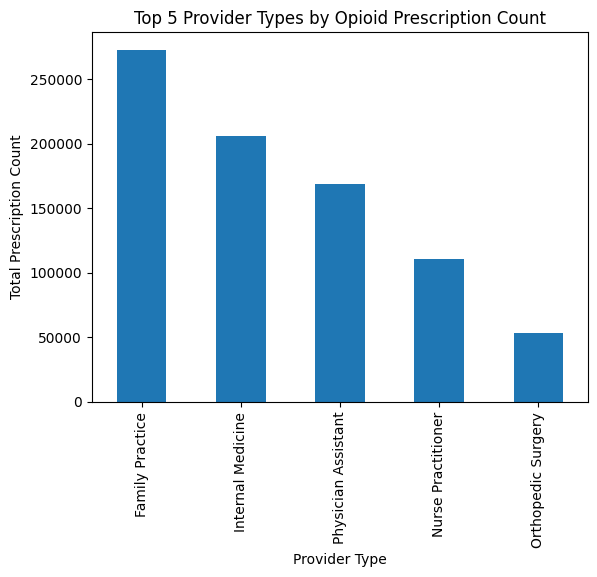

In [3]:
# EX1.
# Calculate the total number of opioid prescriptions for each provider type
prescription_counts = df.groupby("Provider_Type")["HYDROCODONE_script_count", "oxycodone_script_count", "fentanyl_script_count"].sum()

# Identify the top 5 provider types with the highest total opioid prescription counts
top_providers = prescription_counts.sum(axis=1).nlargest(5)

# Plot a bar chart to visualize the distribution of opioid prescription counts across different provider types
top_providers.plot(kind="bar", xlabel="Provider Type", ylabel="Total Prescription Count", title="Top 5 Provider Types by Opioid Prescription Count")
plt.show()


In [4]:
top_providers

Provider_Type
Family Practice        272668
Internal Medicine      206098
Physician Assistant    169099
Nurse Practitioner     110546
Orthopedic Surgery      53226
dtype: int64

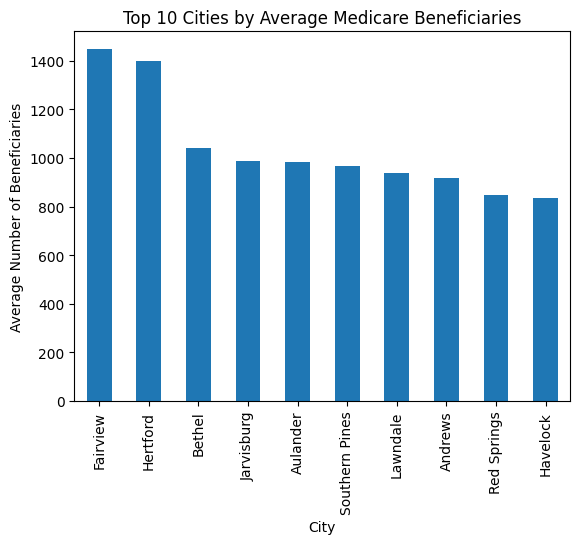

In [5]:
#EX2.
# Group the providers by city_name and calculate the average number of Medicare beneficiaries for each city
average_beneficiaries = df.groupby("city_name")["Num_of_Medicare_Beneficiaries"].mean()

# Identify the top 10 cities with the highest average number of Medicare beneficiaries
top_cities = average_beneficiaries.nlargest(10)

# Plot a bar chart to display the average number of beneficiaries for these top cities
top_cities.plot(kind="bar", xlabel="City", ylabel="Average Number of Beneficiaries", title="Top 10 Cities by Average Medicare Beneficiaries")
plt.show()


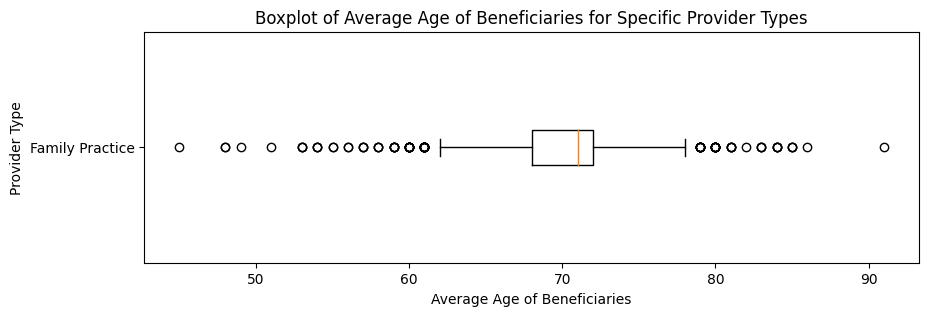

In [6]:
#EX3.
# Filter the dataframe for specific provider types
provider_types = ['Family Practice']
filtered_df = df[df['Provider_Type'].isin(provider_types)]

# Create the boxplot
plt.figure(figsize=(10, 3))
plt.boxplot(filtered_df['Average_Age_of_Beneficiaries'], vert=False)
plt.title('Boxplot of Average Age of Beneficiaries for Specific Provider Types')
plt.xlabel('Average Age of Beneficiaries')
plt.ylabel('Provider Type')
plt.yticks(range(1, len(provider_types) + 1), provider_types)
plt.show()



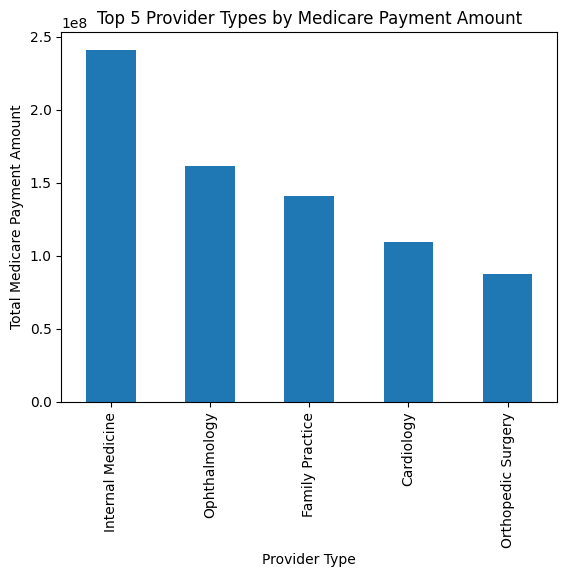

In [7]:
#EX4.
# Calculate the total Medicare payment amount for each provider type
payment_amounts = df.groupby("Provider_Type")["Total_Medicare_Payment_Amt"].sum()

# Identify the top 5 provider types with the highest total Medicare payment amounts
top_payment_providers = payment_amounts.nlargest(5)

# Plot a bar chart to visualize the distribution of Medicare payment amounts for these top provider types
top_payment_providers.plot(kind="bar", xlabel="Provider Type", ylabel="Total Medicare Payment Amount", title="Top 5 Provider Types by Medicare Payment Amount")
plt.show()


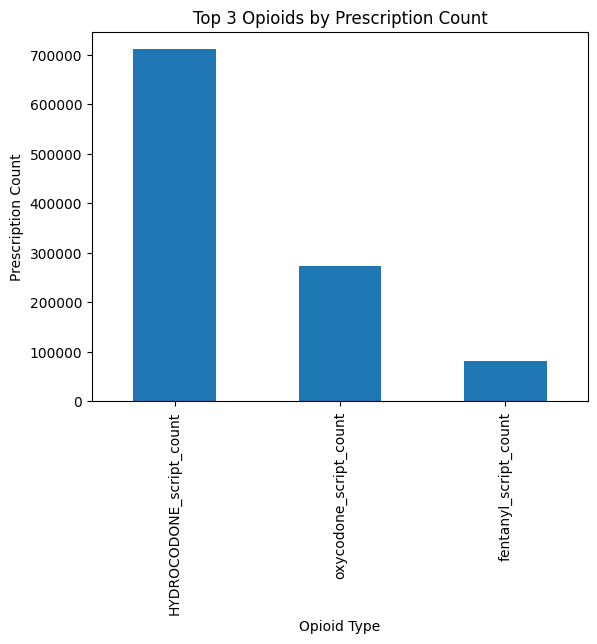

In [8]:
#EX5.
# Compare the prescription counts for different types of opioids across providers
opioid_counts = df[["HYDROCODONE_script_count", "oxycodone_script_count", "fentanyl_script_count"]].sum()

# Identify the top 3 opioids with the highest prescription counts
top_opioids = opioid_counts.nlargest(3)

# Plot a bar chart to display the prescription counts of these top opioids
top_opioids.plot(kind="bar", xlabel="Opioid Type", ylabel="Prescription Count", title="Top 3 Opioids by Prescription Count")
plt.show()


In [9]:
#EX6.
# Create a new column "payment_rank" using rank() and Total_Medicare_Payment_Amt
df['payment_rank'] = df['Total_Medicare_Payment_Amt'].rank(ascending=False)

# Select the top 10 providers based on Total_Medicare_Payment_Amt
top_10_providers = df.nlargest(10, 'Total_Medicare_Payment_Amt')

# Output a table with the desired columns
output_table = top_10_providers[['payment_rank', 'Full_Name', 'Credentials', 'city_name', 'Gender', 'Total_Medicare_Payment_Amt', 'Medical_school_name', 'Graduation_year', 'Primary_specialty']]

output_table


,payment_rank,Full_Name,Credentials,city_name,Gender,Total_Medicare_Payment_Amt,Medical_school_name,Graduation_year,Primary_specialty
9275,1.0,IGOR WESTRA,MD,Wilmington,M,4369383.73,DARTMOUTH MEDICAL SCHOOL,1987.0,OPHTHALMOLOGY
7676,2.0,ARGHAVAN ALMONY,MD,Southern Pines,F,3922027.54,UNIVERSITY OF SOUTHERN CALIFORNIA SCHOOL OF ME...,2004.0,OPHTHALMOLOGY
7484,3.0,JUSTIN C BROWN,M.D.,Charlotte,M,3506128.74,UNIVERSITY OF NORTH CAROLINA AT CHAPEL HILL SC...,1999.0,OPHTHALMOLOGY
3301,4.0,WILLIAM Z BRIDGES,M.D.,Asheville,M,3429932.08,EMORY UNIVERSITY SCHOOL OF MEDICINE,1991.0,OPHTHALMOLOGY
9343,5.0,JOHN P DENNY,M.D.,Raleigh,M,3359878.79,DUKE UNIVERSITY SCHOOL OF MEDICINE,2000.0,OPHTHALMOLOGY
5760,6.0,ANDREW N ANTOSZYK,MD,Charlotte,M,3348433.31,NEW YORK MEDICAL COLLEGE,1983.0,OPHTHALMOLOGY
5792,7.0,RICHARD ORLOWSKI,MD,Hickory,M,3308207.18,WASHINGTON UNIVERSITY SCHOOL OF MEDICINE,1978.0,MEDICAL ONCOLOGY
10994,8.0,GERARD H VANRENS,MD,Wilmington,M,3085343.49,OTHER,1979.0,OPHTHALMOLOGY
13306,9.0,NITIN GUPTA,"M.D., M.P.H.",Raleigh,M,2941754.62,EAST CAROLINA UNIVERSITY SCHOOL OF MEDICINE,2002.0,OPHTHALMOLOGY
8893,10.0,HARI P SAINI,M.D.,Fayetteville,M,2912388.72,WRIGHT STATE UNIVERSITY SCHOOL OF MEDICINE,1998.0,INTERNAL MEDICINE


In [11]:
# EX7.
# Calculate the total sum of "oxycodone_day_count" for each city
city_sum_oxycodone = df.groupby("city_name")["oxycodone_day_count"].sum()

# Identify the top 10 cities with the highest sum of oxycodone day count
top_10_cities = city_sum_oxycodone.nlargest(10)

# Output a table showing the top 10 cities and their respective sums of oxycodone day count
output_table = pd.DataFrame({"City": top_10_cities.index, "Sum of Oxycodone Day Count": top_10_cities.values})
output_table.index = range(1, len(output_table) + 1)  # Reset index starting from 1
print(output_table)

             City  Sum of Oxycodone Day Count
1       Charlotte                      385394
2      Wilmington                      357212
3       Asheville                      300398
4          Durham                      290756
5   Winston Salem                      228756
6         Hickory                      201431
7      Greensboro                      193716
8       Pinehurst                      184080
9        New Bern                      172648
10        Raleigh                      172185
